# Zadanie 3. Regresja liniowa - Dominik Strzałko - 434788

# **1. Część podstawowa** (4 punkty)

### 1.1 Importy bibliotek

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
import ipywidgets as widgets
import csv

from IPython.display import display, Math, Latex

### 1.2 Załadowanie bazy danych (.csv)

In [2]:
reader = csv.reader(open('fires_thefts.csv'), delimiter=',')

x = list()
y = list()
for xi, yi in reader:
    x.append(float(xi))
    y.append(float(yi)) 
    
print('x = {}'.format(x[:10])) 
print('y = {}'.format(y[:10]))

x = [6.2, 9.5, 10.5, 7.7, 8.6, 34.1, 11.0, 6.9, 7.3, 15.1]
y = [29.0, 44.0, 36.0, 37.0, 53.0, 68.0, 75.0, 18.0, 31.0, 25.0]


### 1.3 Funkcja hipotezy

In [3]:
def h(theta, x):
    return theta[0] + theta[1] * x

### 1.4 Funkcje do narysowania wykresu

In [4]:
def regdots(x, y):    
    fig = pl.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter(x, y, c='r', s=50, label='Dane')
    
    ax.set_xlabel(u'Pożary na tyś gospodarstw')
    ax.set_ylabel(u'Włamania na tyś mieszkańców')
    ax.margins(.05, .05)
    pl.ylim(min(y) - 1, max(y) + 1)
    pl.xlim(min(x) - 1, max(x) + 1)
    return fig

def regline(fig, fun, theta, x):
    ax = fig.axes[0]
    x0, x1 = min(x), max(x)
    X = [x0, x1]
    Y = [fun(theta, x) for x in X]
    ax.plot(X, Y, linewidth='2',
            label=(r'$y={theta0}{op}{theta1}x$'.format(
                theta0=theta[0],
                theta1=(theta[1] if theta[1] >= 0 else -theta[1]),
                op='+' if theta[1] >= 0 else '-')))

def legend(fig):
    ax = fig.axes[0]
    handles, labels = ax.get_legend_handles_labels()
    # try-except block is a fix for a bug in Poly3DCollection
    try:
        fig.legend(handles, labels, fontsize='15', loc='lower right')
    except AttributeError:
        pass

### 1.5 Narysuj punkty na osi (x = Pożary na tyś gospodarstw/ y = Włamania na tyś mieszkańców)

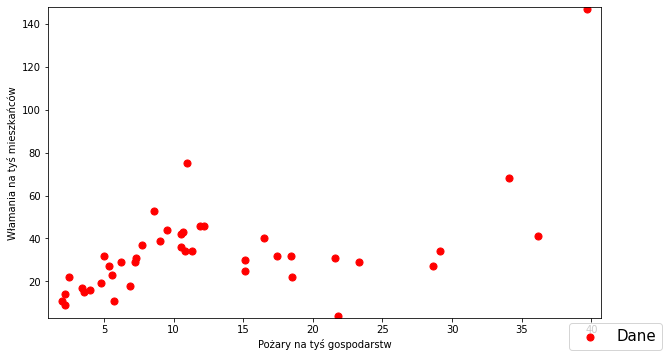

In [5]:
fig = regdots(x,y)
legend(fig)

### 1.6 Funkcja kosztu

In [6]:
def J(h, theta, x, y):
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i])**2 for i in range(m))

### 1.7 Implementacja metody gradientu prostego, do obliczenia wartości minimum funkcji kosztu

In [7]:
def gradient_descent(h, cost_fun, theta, x, y, alpha, eps):
    current_cost = cost_fun(h, theta, x, y)
    log = [[current_cost, theta]]  # log przechowuje wartości kosztu i parametrów
    m = len(y)
    while True:
        new_theta = [
            theta[0] - alpha/float(m) * sum(h(theta, x[i]) - y[i]
                                            for i in range(m)),   
            theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]) * x[i]
                                            for i in range(m))]
        theta = new_theta  # jednoczesna aktualizacja - używamy zmiennej tymaczasowej
        try:
            current_cost, prev_cost = cost_fun(h, theta, x, y), current_cost
        except OverflowError:
            break      
        if abs(prev_cost - current_cost) <= eps:
            break     
        log.append([current_cost, theta])
    return theta, log

### 1.8 funkcja do ładnego printowania wyniku

In [8]:
def LatexMatrix(matrix):
    ltx = r'\left[\begin{array}'
    m, n = matrix.shape
    ltx += '{' + ("r" * n) + '}'
    for i in range(m):
        ltx += r" & ".join([('%.4f' % j.item()) for j in matrix[i]]) + r" \\\\ "
    ltx += r'\end{array}\right]'
    return ltx

### 1.9 Obliczenie **thety** i minimalnej wartości funkcji kosztu (na podstawie thety końcowej). W moim wypadku na start podaję **theta** początkowe równe [10.0,1.0], alpha = 0.001 i epsilon = 0.0001

In [9]:
best_theta, log = gradient_descent(h, J, [10.0, 1.0], x, y, alpha=0.001, eps=0.0001)

display(Math(r'\large\textrm{Wynik:}\quad \theta = ' + 
             LatexMatrix(np.matrix(best_theta).reshape(2,1)) + 
            (r' \quad J(\theta) = %.4f' % log[-1][0])  
            + r' \quad \textrm{po %d iteracjach}' % len(log))) 

<IPython.core.display.Math object>

### 1.10. Funkcje do rysowania wykresu z suwakiem

In [10]:
# Przygotowanie interaktywnego wykresu

sliderSteps2 = widgets.IntSlider(min=0, max=5000, step=1, value=1, description='kroki', width=500)

def slide5(steps):
    costplot2d(h, x, y, gradient_values=log[:steps+1], nohead=True)

In [11]:
def costplot2d(hypothesis, x, y, gradient_values=[], nohead=False):
    fig = pl.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    
    j = lambda theta0, theta1: costfun(hypothesis, x, y)([theta0, theta1])
    X = np.arange(0, 20.1, 0.1)
    Y = np.arange(-1, 4.1, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = np.array([[J(hypothesis, [theta0, theta1], x, y) 
                    for theta0, theta1 in zip(xRow, yRow)] 
                   for xRow, yRow in zip(X, Y)])
    
    N = range(0, 800, 20)
    pl.contour(X, Y, Z, N, cmap='coolwarm', alpha=1)

    #ax.scatter([-3.89578088], [1.19303364], c='r', s=80, marker='x',
     #          label=r'minimum: $J(-3.90, 1.19) = 4.48$')
    
    if len(gradient_values) > 0:
        prev_theta = gradient_values[0][1]
        ax.scatter([prev_theta[0]], [prev_theta[1]],
                   c='g', s=30, marker='D', zorder=100)
        for cost, theta in gradient_values[1:]:
            dtheta = [theta[0] - prev_theta[0], theta[1] - prev_theta[1]]
            ax.arrow(prev_theta[0], prev_theta[1], dtheta[0], dtheta[1], 
                     color='green', 
                     head_width=(0.0 if nohead else 0.1), 
                     head_length=(0.0 if nohead else 0.2),
                     zorder=100)
            prev_theta = theta
    
    return fig

### 1.11. Rysowanie z Suwakiem

In [12]:
widgets.interact_manual(slide5, steps=sliderSteps2)

interactive(children=(IntSlider(value=1, description='kroki', max=5000), Button(description='Run Interact', st…

<function __main__.slide5>

### 1.12. Wykorzystując uzyskaną krzywą regresyjną przepowiedz liczbę włamań na tysiąc mieszkańców dla dzielnicy, w której występuje średnio 50, 100, 200 pożarów na tysiąc gospodarstw domowych.

In [13]:
example_x = 50
predicted_y = h(best_theta, example_x)
print(predicted_y)

83.99699423604544


In [14]:
example_x = 100
predicted_y = h(best_theta, example_x)
print(predicted_y)

151.87402861036708


In [15]:
example_x = 200
predicted_y = h(best_theta, example_x)
print(predicted_y) 

287.6280973590104


# Część zaawansowana (2 punkty)

### 2.1 Zmodyfikowana funkcja gradientu. Działa na podstawie numeru kroków (50 krok = 50 iteracji)

In [16]:
def gradient_descent_mod(h, cost_fun, theta, x, y, alpha, eps, step):
    current_cost = cost_fun(h, theta, x, y)
    log = [[current_cost, theta]]  # log przechowuje wartości kosztu i parametrów
    m = len(y)
    for i in range(step):
        new_theta = [
            theta[0] - alpha/float(m) * sum(h(theta, x[i]) - y[i]
                                            for i in range(m)),   
            theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]) * x[i]
                                            for i in range(m))]
        theta = new_theta  # jednoczesna aktualizacja - używamy zmiennej tymaczasowej
        try:
            current_cost, prev_cost = cost_fun(h, theta, x, y), current_cost
        except OverflowError:
            break      
        if abs(prev_cost - current_cost) <= eps:
            break     
        log.append([current_cost, theta])
    return theta, log

### 2.2 Rysowanie wykresu dla theta = [10.0,1.0]. Skala wykresu to x w przedziale (-10,200), a y (175, 300)

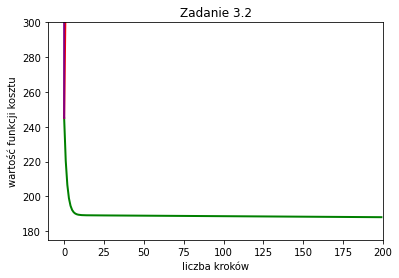

In [17]:
# inicjalizacja
fig = pl.figure()
# dodanie "podwykresu" (zobacz: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot )
ax = fig.add_subplot(111)

ax.set_ylabel('wartość funkcji kosztu')  # opis osi y
ax.set_xlabel('liczba kroków')  # opis osi x
ax.set_title('Zadanie 3.2')  # tytuł wykresu

x1 = np.arange(0, 200, 1)
y1 = []

for i in range(0,200):
  temp, log = gradient_descent_mod(h, J, [10.0, 1.0], x, y, alpha=0.001, eps=0.0001, step=i)
  y1.append(log[-1][0])

line1 = ax.plot(x1, y1, color='green', lw=2)

x2 = np.arange(0, 200, 1)
y2 = []

for i in range(0,200):
  temp, log = gradient_descent_mod(h, J, [10.0, 1.0], x, y, alpha=0.01, eps=0.0001, step=i)
  y2.append(log[-1][0])

line2 = ax.plot(x2, y2, color='red', lw=2)

x3 = np.arange(0, 200, 1)
y3 = []

for i in range(0,200):
  temp, log = gradient_descent_mod(h, J, [10.0, 1.0], x, y, alpha=0.1, eps=0.0001, step=i)
  y3.append(log[-1][0])

line3 = ax.plot(x3, y3, color='purple', lw=2)

pl.xlim(-10, 200)
pl.ylim(175, 300)
#pl.yscale('log')

pl.show()  # pokaż wykres

### 2.3 Dodatkowy wykres dla Theta = [0,0]. Skala wykresu jest logarytmiczna dla zaznaczenia faktu rośnięcia funkcji kosztu dla alfa = 0.01 i 0.1.

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


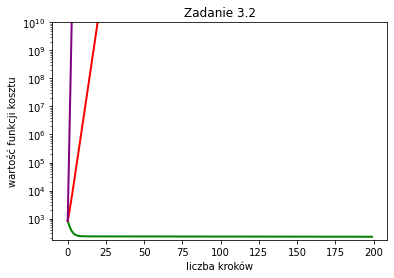

In [18]:
# inicjalizacja
fig = pl.figure()
# dodanie "podwykresu" (zobacz: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot )
ax = fig.add_subplot(111)


ax.set_ylabel('wartość funkcji kosztu')  # opis osi y
ax.set_xlabel('liczba kroków')  # opis osi x
ax.set_title('Zadanie 3.2')  # tytuł wykresu

x1 = np.arange(0, 200, 1)
y1 = []

for i in range(0,200):
  temp, log = gradient_descent_mod(h, J, [0, 0], x, y, alpha=0.001, eps=0.0001, step=i)
  y1.append(log[-1][0])

line1 = ax.plot(x1, y1, color='green', lw=2)

x2 = np.arange(0, 200, 1)
y2 = []

for i in range(0,200):
  temp, log = gradient_descent_mod(h, J, [0, 0], x, y, alpha=0.01, eps=0.0001, step=i)
  y2.append(log[-1][0])

line2 = ax.plot(x2, y2, color='red', lw=2)

x3 = np.arange(0, 200, 1)
y3 = []

for i in range(0,200):
  temp, log = gradient_descent_mod(h, J, [0, 0], x, y, alpha=0.1, eps=0.0001, step=i)
  y3.append(log[-1][0])

line3 = ax.plot(x3, y3, color='purple', lw=2)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_ylim((175, 10000000000))

pl.show()  # pokaż wykres